In [4]:
import pandas as pd
data=pd.read_csv("/content/sample_height_weight_20.csv")
data

,Name,Height_cm,Weight_kg
0,Person_1,188,51
1,Person_2,178,70
2,Person_3,164,82
3,Person_4,157,61
4,Person_5,170,71
5,Person_6,188,93
6,Person_7,168,74
7,Person_8,172,98
8,Person_9,160,76
9,Person_10,160,91


In [5]:
X=data[['Height_cm']]
Y=data[['Weight_kg']]
print(X)
print(Y)

    Height_cm
0         188
1         178
2         164
3         157
4         170
5         188
6         168
7         172
8         160
9         160
10        173
11        185
12        189
13        173
14        152
15        171
16        151
17        173
18        179
19        187
    Weight_kg
0          51
1          70
2          82
3          61
4          71
5          93
6          74
7          98
8          76
9          91
10         77
11         65
12         64
13         96
14         93
15         52
16         86
17         56
18         70
19         58


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)
# This line splits the data into training and testing sets,
# using 33% of the data for testing and keeping the split the same every time by setting a fixed random seed (33).

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
#This code scales the training and test data so that all feature values are between 0 and 1,
#fitting the scaler on X_train and then applying the same scaling to X_test.

In [8]:
import torch

X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
Y_train_tensor=torch.tensor(Y_train.values,dtype=torch.float32).view(-1,1)
X_test_tensor=torch.tensor(X_test,dtype=torch.float32)
Y_test_tensor=torch.tensor(Y_test.values,dtype=torch.float32).view(-1,1)
#This code converts the training and test data (features and labels) into PyTorch tensors of type float32,
#reshaping the labels into column vectors for model compatibility.

In [9]:
import torch.nn as nn
class Neural(nn.Module):
  def __init__(self):
    super().__init__()
    # Defines the layers based on the image's architecture
    self.fc1=nn.Linear(1, 8)    # Input (1) -> Hidden Layer 1 (8)
    self.fc2=nn.Linear(8, 12)   # Hidden Layer 1 (8) -> Hidden Layer 2 (12)
    self.fc3=nn.Linear(12, 1)   # Hidden Layer 2 (12) -> Output (1)
    self.relu=nn.ReLU()
    self.history={'loss':[]}

  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [10]:
ai = Neural()
criterion=nn.MSELoss()
optimizer=torch.optim.RMSprop(ai.parameters(),lr=0.001)

In [11]:
def train_model(ai,X_train,y_train,criterion,optimizer,epochs=3000):
  for epoch in range(epochs):
    optimizer.zero_grad()
    loss = criterion(ai(X_train),y_train)
    loss.backward()
    optimizer.step()

    ai.history['loss'].append(loss.item())
    if epoch % 200 == 0:
      print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}")


In [12]:
train_model(ai,X_train_tensor,Y_train_tensor,criterion,optimizer)

Epoch [0/3000], Loss: 6350.413086
Epoch [200/3000], Loss: 5395.276367
Epoch [400/3000], Loss: 3875.030029
Epoch [600/3000], Loss: 2123.704834
Epoch [800/3000], Loss: 773.970703
Epoch [1000/3000], Loss: 289.567413
Epoch [1200/3000], Loss: 232.435516
Epoch [1400/3000], Loss: 198.725845
Epoch [1600/3000], Loss: 171.806564
Epoch [1800/3000], Loss: 151.047379
Epoch [2000/3000], Loss: 137.047653
Epoch [2200/3000], Loss: 132.035324
Epoch [2400/3000], Loss: 131.826401
Epoch [2600/3000], Loss: 131.817169
Epoch [2800/3000], Loss: 131.820892


In [13]:
with torch.no_grad():
  test_loss=criterion(ai(X_test_tensor),Y_test_tensor)
  print(f"Test loss: {test_loss.item():.6f}")

Test loss: 295.044525


Text(0, 0.5, 'Loss')

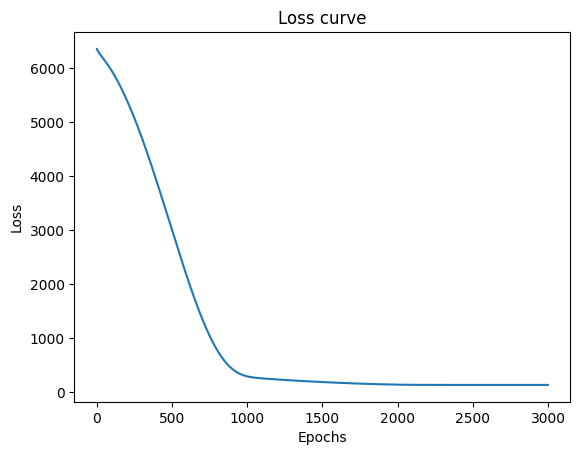

In [14]:
import matplotlib.pyplot as plt
plt.plot(ai.history['loss'])
plt.title("Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [15]:
X_n1_1 = torch.tensor([[50]], dtype=torch.float32)
pred = ai(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {pred}')

Prediction: 141.28578186035156


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
